In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# INPUTS:

# data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/"
data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/"

training_data_name = "tiling"

data_name = "yeast_chrV_1bpresolution_subsequence50" # csv

data_file_type = ".csv"

sequence_column_name = "sequence"

In [3]:
# genome_df_chrV = pd.read_csv(f"{data_folder_path}ir_lstm_cn_{training_data_name}_{data_name}_smoothC0.csv")
genome_df_chrV = pd.read_csv(f"{data_folder_path}ir_lstm_cn_{training_data_name}_{data_name}_smoothC0_10_11.csv")

In [4]:
genome_df_chrV_aligned = pd.read_csv(f"{data_folder_path}yeast_chrV_nucleosome_alignment_window_size200.csv")

In [5]:
cn_avg_pred_df = pd.read_csv(f"{data_folder_path}ir_lstm_cn_{training_data_name}_yeast_chrV_1bpresolution_subsequence50_predictions.csv")

In [6]:
genome_df_chrV = pd.concat([genome_df_chrV, cn_avg_pred_df], axis=1)

In [7]:
genome_df_chrV

,sequence,chrID,position,smooth_C26,smooth_C29,smooth_C31,smooth_C26_rev_comp,smooth_C29_rev_comp,smooth_C31_rev_comp,smoothC0,...,n=26_reverse,n=29_reverse,n=31_reverse,n=26_comp,n=29_comp,n=31_comp,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp,C0
0,CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAA...,chrV,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.035031,1.047136,-0.469321,1.863749,1.648355,0.800228,-0.525005,-0.368169,-0.418247,-0.416519
1,GTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAA...,chrV,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.220499,0.240150,0.077993,1.554749,2.095215,1.762567,-0.555140,-0.284141,-0.262650,-0.355435
2,TCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAG...,chrV,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.019326,-0.313433,0.935878,1.260944,2.226643,2.123617,-0.514449,-0.382669,-0.338941,-0.395895
3,CTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGC...,chrV,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.636463,-0.242350,1.518844,0.451818,2.176857,2.198343,-0.553157,-0.471041,-0.345032,-0.396418
4,TCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCT...,chrV,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.915955,0.587437,1.876456,0.118319,1.838895,2.114885,-0.742663,-0.157121,0.043354,-0.467565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576820,ATGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTT...,chrV,576820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.020843,-1.509358,-1.959355,-1.372557,-0.701077,-1.094367,2.072896,1.507879,0.331652,1.069545
576821,TGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTT...,chrV,576821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.464343,-1.708619,-1.954342,-1.618316,-1.146228,-1.331187,2.071106,0.975800,-0.319321,1.412484
576822,GTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTT...,chrV,576822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.717937,-1.655562,-1.890883,-1.757556,-1.490416,-1.578371,1.588807,-0.089022,-0.478377,0.957592
576823,TAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTTT...,chrV,576823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.803639,-1.486870,-1.511242,-1.684635,-1.735190,-1.765663,0.918664,-0.923980,-0.117385,0.631284


In [8]:
genome_df_chrV_aligned["n=26"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=26"].values
genome_df_chrV_aligned["n=29"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=29"].values
genome_df_chrV_aligned["n=31"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=31"].values
genome_df_chrV_aligned["n=26_rev_comp"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=26_rev_comp"].values
genome_df_chrV_aligned["n=29_rev_comp"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=29_rev_comp"].values
genome_df_chrV_aligned["n=31_rev_comp"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=31_rev_comp"].values
genome_df_chrV_aligned["smoothC0"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "smoothC0"].values

In [9]:
genome_df_chrV_aligned

,sequence,distance_to_nucleosome,chrID,nucleosome_center,position,n=26,n=29,n=31,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp,smoothC0
0,CCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTT...,-200,chrV,233,8,-0.194927,-0.469367,-0.554537,-0.160897,-0.001296,-0.372589,-0.367475
1,CAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTA...,-199,chrV,233,9,-0.277341,-0.466282,-0.558129,-0.220960,-0.203360,-0.572820,-0.356364
2,AAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTAC...,-198,chrV,233,10,-0.320842,-0.207001,-0.422720,-0.175286,-0.645260,-0.808290,-0.343152
3,AGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACT...,-197,chrV,233,11,-0.424420,-0.134078,-0.229734,-0.345943,-0.814332,-0.667328,-0.319064
4,GCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTA...,-196,chrV,233,12,-0.619899,0.154437,0.097751,-0.364871,-0.846146,-0.494482,-0.279821
...,...,...,...,...,...,...,...,...,...,...,...,...
1276795,AAGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACA...,195,chrV,576556,576726,-0.364871,-0.846146,-0.494482,-0.619899,0.154437,0.097751,-0.279821
1276796,AGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAG...,196,chrV,576556,576727,-0.345943,-0.814332,-0.667328,-0.424420,-0.134078,-0.229734,-0.319064
1276797,GGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGG...,197,chrV,576556,576728,-0.175286,-0.645260,-0.808290,-0.320842,-0.207001,-0.422720,-0.343152
1276798,GTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGGG...,198,chrV,576556,576729,-0.220960,-0.203360,-0.572820,-0.277341,-0.466282,-0.558129,-0.356364


In [10]:
genome_df_chrV_dist_nuc_grouped = genome_df_chrV_aligned.groupby("distance_to_nucleosome").mean(numeric_only=True)

In [11]:
xlims_aligned=[-200, 200]
ylims_aligned1=[-0.4, 0.4]
alpha_val_aligned = 0.5

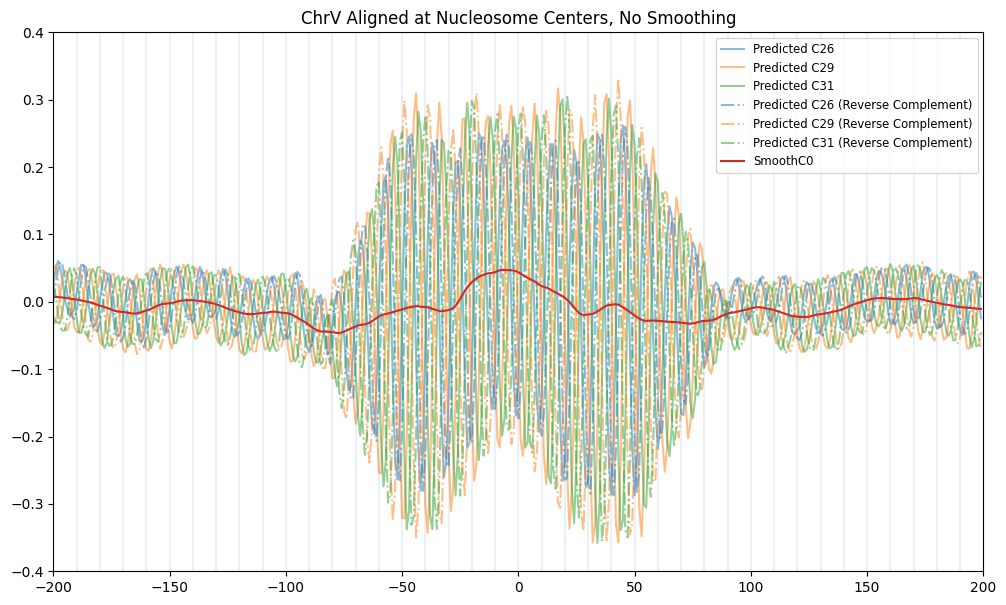

In [12]:
plt.figure(figsize=(12,7))

plt.plot(genome_df_chrV_dist_nuc_grouped["n=26"], label="Predicted C26", 
         alpha=alpha_val_aligned, color="C0")
plt.plot(genome_df_chrV_dist_nuc_grouped["n=29"], label="Predicted C29", 
         alpha=alpha_val_aligned, color="C1")
plt.plot(genome_df_chrV_dist_nuc_grouped["n=31"], label="Predicted C31", 
         alpha=alpha_val_aligned, color="C2")

plt.plot(genome_df_chrV_dist_nuc_grouped["n=26_rev_comp"], label="Predicted C26 (Reverse Complement)", 
         alpha=alpha_val_aligned, color="C0", linestyle="dashdot")
plt.plot(genome_df_chrV_dist_nuc_grouped["n=29_rev_comp"], label="Predicted C29 (Reverse Complement)", 
         alpha=alpha_val_aligned, color="C1", linestyle="dashdot")
plt.plot(genome_df_chrV_dist_nuc_grouped["n=31_rev_comp"], label="Predicted C31 (Reverse Complement)", 
         alpha=alpha_val_aligned, color="C2", linestyle="dashdot")

plt.plot(genome_df_chrV_dist_nuc_grouped["smoothC0"], label="SmoothC0", color="C3")

# plt.vlines([-74, 73], ylims_aligned1[0], ylims_aligned1[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims_aligned1[0], ylims_aligned1[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")

plt.vlines([i*10 for i in list(range(-20, 20))], ylims_aligned1[0], ylims_aligned1[1], alpha=0.1)

plt.title("ChrV Aligned at Nucleosome Centers, No Smoothing")
plt.legend(fontsize="small")
plt.xlim(xlims_aligned)
plt.ylim(ylims_aligned1)
plt.show()

In [13]:
ylims_aligned2=[-0.1, 0.1]

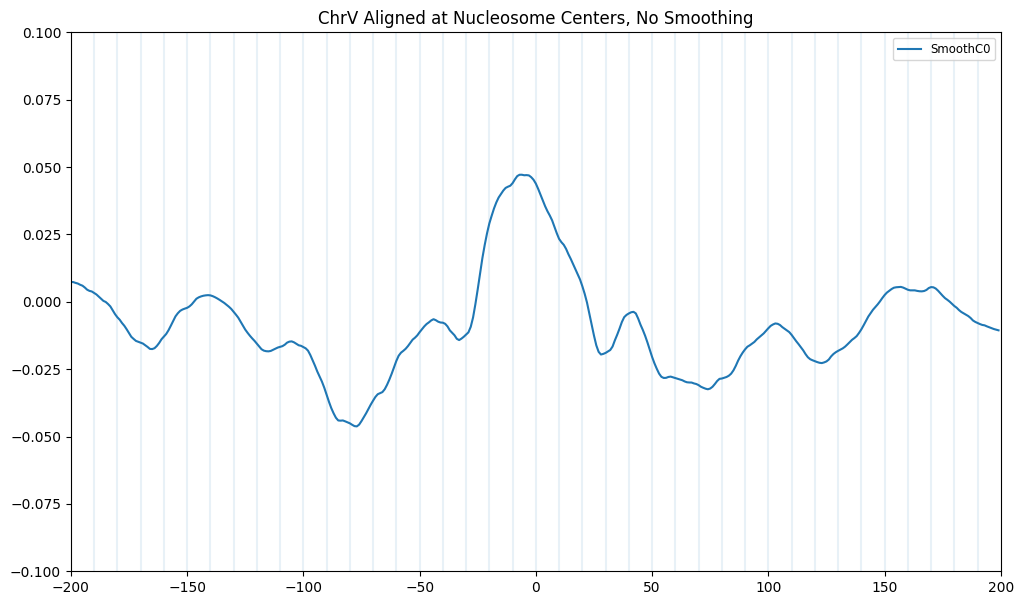

In [14]:
plt.figure(figsize=(12,7))

# plt.plot(genome_df_chrV_dist_nuc_grouped["n=26"], label="Predicted C26", 
#          alpha=alpha_val_aligned, color="C0")
# plt.plot(genome_df_chrV_dist_nuc_grouped["n=29"], label="Predicted C29", 
#          alpha=alpha_val_aligned, color="C1")
# plt.plot(genome_df_chrV_dist_nuc_grouped["n=31"], label="Predicted C31", 
#          alpha=alpha_val_aligned, color="C2")

# plt.plot(genome_df_chrV_dist_nuc_grouped["n=26_rev_comp"], label="Predicted C26 (Reverse Complement)", 
#          alpha=alpha_val_aligned, color="C0", linestyle="dashdot")
# plt.plot(genome_df_chrV_dist_nuc_grouped["n=29_rev_comp"], label="Predicted C29 (Reverse Complement)", 
#          alpha=alpha_val_aligned, color="C1", linestyle="dashdot")
# plt.plot(genome_df_chrV_dist_nuc_grouped["n=31_rev_comp"], label="Predicted C31 (Reverse Complement)", 
#          alpha=alpha_val_aligned, color="C2", linestyle="dashdot")

plt.plot(genome_df_chrV_dist_nuc_grouped["smoothC0"], label="SmoothC0")
# plt.plot(genome_df_chrV_dist_nuc_grouped["smoothC0"], label="SmoothC0", color="C3")

# plt.vlines([-74, 73], ylims_aligned2[0], ylims_aligned2[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims_aligned2[0], ylims_aligned2[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")

plt.vlines([i*10 for i in list(range(-20, 20))], ylims_aligned2[0], ylims_aligned2[1], alpha=0.1)

plt.title("ChrV Aligned at Nucleosome Centers, No Smoothing")
plt.legend(fontsize="small")
plt.xlim(xlims_aligned)
plt.ylim(ylims_aligned2)
plt.show()